In [1]:
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib
import IPython
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Iris dataset

Load the Iris dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print (iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


## Softmax Regression

Keep only the first 2 variables but this time allow all possible y-values

In [5]:
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

Normalise data (typically this is done to a mean of 0 and a standard deviation of 1)

For more on data standardisation: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

Define Softmax model which allows for non-binary outcomes

Note: the current version of the Softmax function here uses Gradient Descent

In [7]:
class Softmax:
    
    def __init__(self,eta,nepochs,lam):
        self.nepochs = nepochs
        self.eta = eta
        self.lam = lam
    
    def OneHot(self,y):
        hot_mat = np.zeros((len(y), len(np.unique(y))))
        for i, val in enumerate(y):
            hot_mat[i, val] = 1
        return hot_mat
        
    def net_input(self,x):
        return x.dot(self.weights) + self.bias
    
    def softmax(self,z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T      
    
    def fit(self,x,y):
        self.num_outcomes = len(np.unique(y))
        self.weights = np.random.random((len(x[0]),self.num_outcomes))
        self.bias = np.random.random(self.num_outcomes)
        
        y = self.OneHot(y)
        
        for i in range(self.nepochs):
            net_input = self.net_input(x)
            softmax = self.softmax(net_input)
            error = softmax - y
            
            grad = np.dot(x.T,error)
            
            self.weights -= self.eta*(grad + self.lam*self.weights)
            self.bias -= self.eta*np.sum(error,axis=0)
            
        return self
    
    def predict(self,x):
        net_input = self.net_input(x)
        softmax = self.softmax(net_input)
        return softmax.argmax(axis=1)
        

Set the initial parameters of the model

Note varying of the lambda parameter can have a large impact on the model

In [8]:
soft = Softmax(0.01,10,12)

Fit the model

In [9]:
soft.fit(X_train,y_train)

Test the model

In [10]:
ypred = soft.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, ypred))

Accuracy: 0.76


Plot the model

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,
                       test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=cmap(idx),
                       marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')

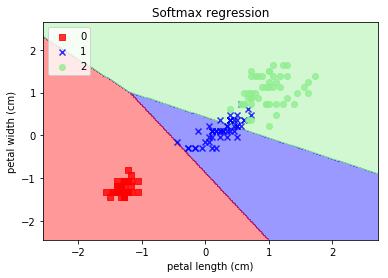

In [12]:
for

### Additional information found at:

http://ufldl.stanford.edu/tutorial/ (for a mathematical overview)

https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/softmax-regression.ipynb (for some example code and mathematical review of the above)